# Part 1: Data Wrangling
First we will import all the relevant packages.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  
import numpy as np

Now we will import all the data and get a look at it all.

In [8]:
df = pd.read_excel("Cities.xls")
print(df.shape)
df.head()

(331, 79)


,Unnamed: 0,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,284,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,...,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
1,9,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,4.0,...,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
2,185,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,60.0,...,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
3,327,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,...,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
4,66,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,...,0.060128,0.103334,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617


Our data set consists of 331 rows and 79 columns. Because we want to predict the CO2 emissions per capita we will rearrange the data so it is one of the first columns we take a look at.

In [33]:
cols_to_order = df[['CO2 Emissions per Capita (metric tonnes)']]

new_columns = df.drop(cols_to_order, axis=1)
new_columns.insert(3,'CO2 Emissions per Capita (metric tonnes)',cols_to_order)
data = new_columns
data.head()

,Unnamed: 0,City,cityID,CO2 Emissions per Capita (metric tonnes),clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,284,Baltimore(MD),285,14.300000,7,Auto Sprawl,United States,85.0,6.1,0.3,...,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
1,9,Melbourne,10,10.200000,8,Auto Innovative,Australia,80.0,14.0,2,...,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
2,185,Niamey,186,0.106861,1,Congested Emerging,Niger,NaN,9.0,2,...,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
3,327,Hanoi,328,1.700368,12,MetroBike Emerging,Vietnam,8.0,10.0,2,...,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
4,66,Urumqi,67,7.550916,12,MetroBike Emerging,China,21.7,54.7,NaN,...,0.060128,0.103334,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617


We see that there are alot of NaN values in the data. Since the dataset only consists of 331 observations, we can't just remove the observations with NaN values. 
There are many ways to solve thhis issue. We could fill the NaN spots with certain values (like 0) or insert mean, mode or any other statistical measure based on the the non NaN values in the column.

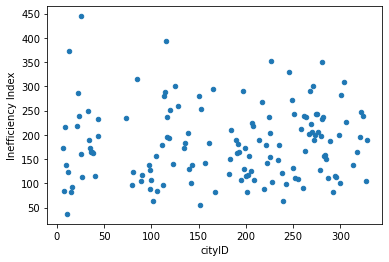

In [36]:
ax1 = data.plot.scatter(x='cityID',
                      y='Inefficiency Index')

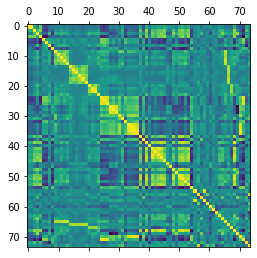

In [34]:
plt.matshow(data.corr())
plt.show()
